In [46]:
import pandas as pd 

data = pd.read_csv('./data/ev_breakdown.csv' ,encoding='cp949')

df = pd.DataFrame(data)

In [47]:
df.describe()

,호선,역명,장비,호기,고장발생일자,고장발생시간,조치완료일자,조치완료시간,조치소요시간,고장원인
count,565,566,566,566,566,566,566,566,566,566
unique,3,68,1,7,365,410,364,184,184,10
top,1호선,월촌,E/L,#1,2024-06-24,05:30,2023-02-28,15:00,00:45,(E/L)도어장치 장애
freq,321,40,566,225,5,15,6,18,18,200


In [48]:
df['고장발생일자'] = pd.to_datetime(df['고장발생일자'])  
df['month']    = df['고장발생일자'].dt.month_name() 
df['weekday']  = df['고장발생일자'].dt.day_name() 


In [ ]:
df['weekday'].value_counts()

weekday
Monday       110
Tuesday       93
Wednesday     89
Friday        85
Thursday      79
Saturday      64
Sunday        46
Name: count, dtype: int64

# Seaborn 시각화

/var/folders/3_/_16tlvps5z768_sdb6hpw9q80000gn/T/ipykernel_48705/1440281028.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="Blues")


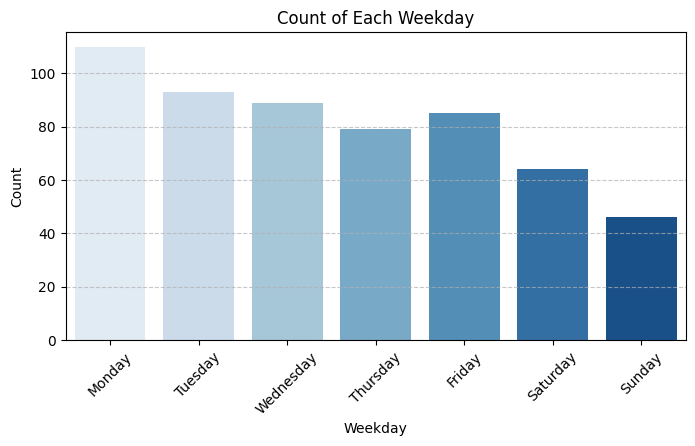

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
weekday_counts = df['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    fill_value=0
)

plt.figure(figsize=(8, 4))


sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette= "Blues")

# 6. 그래프 설정
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Count of Each Weekday')
plt.xticks(rotation=45)  # X축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 7. 그래프 출력
plt.show()